In [0]:
!pip install -q keras
import keras

In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread, imresize
import warnings; warnings.simplefilter('ignore')
from google.colab import files

In [0]:
# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
from keras import backend as k

# Don't pre-allocate memory; allocate as-needed
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

In [0]:
num_classes = 10
epochs = 50
batch_size = 32
lrate = 0.01
decay = lrate/epochs

In [29]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])  
y_test = y_test.reshape(y_test.shape[0])

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'validation samples')

X_train shape: (50000, 32, 32, 3)
50000 training samples
10000 validation samples


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [34]:
# Compile model
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
__________

In [35]:
DataGenerator = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, Y_test),
    shuffle=True
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 23s 457us/step - loss: 1.7516 - acc: 0.3683 - val_loss: 1.4435 - val_acc: 0.4966
Epoch 2/50
19424/50000 [==========>...................] - ETA: 12s - loss: 1.4415 - acc: 0.4848

50000/50000 [==============================] - 22s 444us/step - loss: 1.3852 - acc: 0.5022 - val_loss: 1.2343 - val_acc: 0.5668
Epoch 3/50
45824/50000 [==========================>...] - ETA: 1s - loss: 1.2152 - acc: 0.5680

50000/50000 [==============================] - 22s 446us/step - loss: 1.2134 - acc: 0.5692 - val_loss: 1.1222 - val_acc: 0.6039
Epoch 4/50
50000/50000 [==============================] - 22s 447us/step - loss: 1.0894 - acc: 0.6113 - val_loss: 1.0558 - val_acc: 0.6205
Epoch 5/50
 3360/50000 [=>............................] - ETA: 19s - loss: 0.9831 - acc: 0.6429

50000/50000 [==============================] - 22s 447us/step - loss: 0.9917 - acc: 0.6437 - val_loss: 1.0307 - val_acc: 0.6390
Epoch 6/50
39680/50000 [======================>.......] - ETA: 4s - loss: 0.8956 - acc: 0.6820

50000/50000 [==============================] - 22s 449us/step - loss: 0.9000 - acc: 0.6810 - val_loss: 0.9831 - val_acc: 0.6511
Epoch 7/50
50000/50000 [==============================] - 22s 445us/step - loss: 0.8193 - acc: 0.7100 - val_loss: 0.9605 - val_acc: 0.6615
Epoch 8/50
 1952/50000 [>.............................] - ETA: 20s - loss: 0.7400 - acc: 0.7336

50000/50000 [==============================] - 22s 445us/step - loss: 0.7487 - acc: 0.7331 - val_loss: 0.9528 - val_acc: 0.6688
Epoch 9/50
39168/50000 [======================>.......] - ETA: 4s - loss: 0.6732 - acc: 0.7589

50000/50000 [==============================] - 22s 446us/step - loss: 0.6750 - acc: 0.7584 - val_loss: 0.9346 - val_acc: 0.6772
Epoch 10/50
50000/50000 [==============================] - 22s 445us/step - loss: 0.6142 - acc: 0.7818 - val_loss: 0.9470 - val_acc: 0.6821
Epoch 11/50
 1696/50000 [>.............................] - ETA: 20s - loss: 0.5536 - acc: 0.8031

50000/50000 [==============================] - 22s 449us/step - loss: 0.5593 - acc: 0.8013 - val_loss: 0.9405 - val_acc: 0.6840
Epoch 12/50
38944/50000 [======================>.......] - ETA: 4s - loss: 0.5041 - acc: 0.8216

50000/50000 [==============================] - 22s 446us/step - loss: 0.5079 - acc: 0.8196 - val_loss: 0.9320 - val_acc: 0.6879
Epoch 13/50
50000/50000 [==============================] - 22s 446us/step - loss: 0.4651 - acc: 0.8349 - val_loss: 0.9514 - val_acc: 0.6913
Epoch 14/50
 1568/50000 [..............................] - ETA: 20s - loss: 0.4070 - acc: 0.8495

50000/50000 [==============================] - 22s 445us/step - loss: 0.4220 - acc: 0.8509 - val_loss: 0.9969 - val_acc: 0.6884
Epoch 15/50
39008/50000 [======================>.......] - ETA: 4s - loss: 0.3796 - acc: 0.8654

50000/50000 [==============================] - 22s 446us/step - loss: 0.3823 - acc: 0.8643 - val_loss: 1.0170 - val_acc: 0.6890
Epoch 16/50
50000/50000 [==============================] - 22s 442us/step - loss: 0.3520 - acc: 0.8747 - val_loss: 1.0217 - val_acc: 0.6939
Epoch 17/50
 1696/50000 [>.............................] - ETA: 20s - loss: 0.2982 - acc: 0.8968

50000/50000 [==============================] - 22s 444us/step - loss: 0.3222 - acc: 0.8860 - val_loss: 1.0309 - val_acc: 0.6905
Epoch 18/50
38912/50000 [======================>.......] - ETA: 4s - loss: 0.2959 - acc: 0.8942

50000/50000 [==============================] - 22s 447us/step - loss: 0.2987 - acc: 0.8935 - val_loss: 1.0577 - val_acc: 0.6939
Epoch 19/50
50000/50000 [==============================] - 22s 448us/step - loss: 0.2781 - acc: 0.9019 - val_loss: 1.0780 - val_acc: 0.6908
Epoch 20/50
 1568/50000 [..............................] - ETA: 20s - loss: 0.2537 - acc: 0.9158

50000/50000 [==============================] - 22s 445us/step - loss: 0.2546 - acc: 0.9095 - val_loss: 1.0714 - val_acc: 0.6972
Epoch 21/50
38848/50000 [======================>.......] - ETA: 4s - loss: 0.2386 - acc: 0.9174

50000/50000 [==============================] - 22s 445us/step - loss: 0.2379 - acc: 0.9173 - val_loss: 1.0980 - val_acc: 0.6987
Epoch 22/50
50000/50000 [==============================] - 22s 446us/step - loss: 0.2232 - acc: 0.9212 - val_loss: 1.1365 - val_acc: 0.6972
Epoch 23/50
 1568/50000 [..............................] - ETA: 20s - loss: 0.2366 - acc: 0.9165

50000/50000 [==============================] - 22s 444us/step - loss: 0.2065 - acc: 0.9289 - val_loss: 1.1593 - val_acc: 0.6928
Epoch 24/50
38944/50000 [======================>.......] - ETA: 4s - loss: 0.1973 - acc: 0.9320

50000/50000 [==============================] - 22s 444us/step - loss: 0.1987 - acc: 0.9315 - val_loss: 1.1375 - val_acc: 0.7018
Epoch 25/50
50000/50000 [==============================] - 22s 446us/step - loss: 0.1843 - acc: 0.9362 - val_loss: 1.1602 - val_acc: 0.7011
Epoch 26/50
 1568/50000 [..............................] - ETA: 20s - loss: 0.1971 - acc: 0.9298

50000/50000 [==============================] - 22s 444us/step - loss: 0.1745 - acc: 0.9401 - val_loss: 1.1741 - val_acc: 0.7008
Epoch 27/50
38848/50000 [======================>.......] - ETA: 4s - loss: 0.1669 - acc: 0.9416

50000/50000 [==============================] - 22s 443us/step - loss: 0.1662 - acc: 0.9420 - val_loss: 1.2119 - val_acc: 0.7007
Epoch 28/50
50000/50000 [==============================] - 22s 445us/step - loss: 0.1577 - acc: 0.9456 - val_loss: 1.1865 - val_acc: 0.6986
Epoch 29/50
 1568/50000 [..............................] - ETA: 20s - loss: 0.1231 - acc: 0.9598

50000/50000 [==============================] - 22s 443us/step - loss: 0.1520 - acc: 0.9474 - val_loss: 1.2041 - val_acc: 0.7017
Epoch 30/50
38944/50000 [======================>.......] - ETA: 4s - loss: 0.1393 - acc: 0.9525

50000/50000 [==============================] - 22s 445us/step - loss: 0.1416 - acc: 0.9516 - val_loss: 1.2251 - val_acc: 0.7052
Epoch 31/50
50000/50000 [==============================] - 22s 445us/step - loss: 0.1327 - acc: 0.9545 - val_loss: 1.2521 - val_acc: 0.7015
Epoch 32/50
 1568/50000 [..............................] - ETA: 20s - loss: 0.1270 - acc: 0.9592

50000/50000 [==============================] - 22s 445us/step - loss: 0.1288 - acc: 0.9561 - val_loss: 1.2649 - val_acc: 0.7054
Epoch 33/50
38816/50000 [======================>.......] - ETA: 4s - loss: 0.1259 - acc: 0.9574

50000/50000 [==============================] - 22s 444us/step - loss: 0.1264 - acc: 0.9571 - val_loss: 1.2539 - val_acc: 0.7008
Epoch 34/50
50000/50000 [==============================] - 22s 444us/step - loss: 0.1143 - acc: 0.9607 - val_loss: 1.2737 - val_acc: 0.7043
Epoch 35/50
 1568/50000 [..............................] - ETA: 20s - loss: 0.1303 - acc: 0.9554

50000/50000 [==============================] - 22s 445us/step - loss: 0.1160 - acc: 0.9601 - val_loss: 1.3047 - val_acc: 0.6973
Epoch 36/50
38784/50000 [======================>.......] - ETA: 4s - loss: 0.1098 - acc: 0.9616

50000/50000 [==============================] - 22s 446us/step - loss: 0.1112 - acc: 0.9611 - val_loss: 1.2914 - val_acc: 0.7029
Epoch 37/50
50000/50000 [==============================] - 22s 446us/step - loss: 0.1109 - acc: 0.9629 - val_loss: 1.2784 - val_acc: 0.7035
Epoch 38/50
 1568/50000 [..............................] - ETA: 20s - loss: 0.1026 - acc: 0.9643

50000/50000 [==============================] - 22s 447us/step - loss: 0.1045 - acc: 0.9644 - val_loss: 1.3149 - val_acc: 0.7014
Epoch 39/50
38752/50000 [======================>.......] - ETA: 4s - loss: 0.0997 - acc: 0.9661

50000/50000 [==============================] - 22s 446us/step - loss: 0.0995 - acc: 0.9661 - val_loss: 1.3283 - val_acc: 0.7054
Epoch 40/50
50000/50000 [==============================] - 22s 448us/step - loss: 0.0983 - acc: 0.9666 - val_loss: 1.3417 - val_acc: 0.7039
Epoch 41/50
 1568/50000 [..............................] - ETA: 20s - loss: 0.0997 - acc: 0.9694

50000/50000 [==============================] - 22s 447us/step - loss: 0.0962 - acc: 0.9674 - val_loss: 1.3360 - val_acc: 0.7050
Epoch 42/50
38848/50000 [======================>.......] - ETA: 4s - loss: 0.0905 - acc: 0.9697

50000/50000 [==============================] - 22s 445us/step - loss: 0.0916 - acc: 0.9693 - val_loss: 1.3401 - val_acc: 0.7054
Epoch 43/50
50000/50000 [==============================] - 22s 447us/step - loss: 0.0897 - acc: 0.9700 - val_loss: 1.3400 - val_acc: 0.7063
Epoch 44/50
 1568/50000 [..............................] - ETA: 20s - loss: 0.0816 - acc: 0.9745

50000/50000 [==============================] - 22s 446us/step - loss: 0.0872 - acc: 0.9707 - val_loss: 1.3451 - val_acc: 0.7061
Epoch 45/50
38976/50000 [======================>.......] - ETA: 4s - loss: 0.0823 - acc: 0.9722

50000/50000 [==============================] - 22s 445us/step - loss: 0.0836 - acc: 0.9720 - val_loss: 1.3767 - val_acc: 0.7049
Epoch 46/50
50000/50000 [==============================] - 22s 446us/step - loss: 0.0808 - acc: 0.9732 - val_loss: 1.3714 - val_acc: 0.7026
Epoch 47/50
 1568/50000 [..............................] - ETA: 20s - loss: 0.0822 - acc: 0.9732

50000/50000 [==============================] - 22s 448us/step - loss: 0.0797 - acc: 0.9732 - val_loss: 1.3748 - val_acc: 0.7047
Epoch 48/50
38784/50000 [======================>.......] - ETA: 4s - loss: 0.0778 - acc: 0.9749

50000/50000 [==============================] - 22s 445us/step - loss: 0.0777 - acc: 0.9746 - val_loss: 1.3841 - val_acc: 0.7076
Epoch 49/50
50000/50000 [==============================] - 22s 447us/step - loss: 0.0763 - acc: 0.9737 - val_loss: 1.4089 - val_acc: 0.7033
Epoch 50/50
 1568/50000 [..............................] - ETA: 20s - loss: 0.0668 - acc: 0.9796

50000/50000 [==============================] - 22s 444us/step - loss: 0.0751 - acc: 0.9753 - val_loss: 1.4074 - val_acc: 0.7055


In [0]:
def Over_Fitting_Score(h):
    gap = []
    n = len(h.epoch)
    for i in h.epoch:
        acc = h.history['acc'][i]
        val_acc = h.history['val_acc'][i]
        # late gaps get higher weight ..
        gap.append( i * abs(acc-val_acc))
    ofs = sum(gap) / (n * (n-1) / 2)
    return ofs

In [0]:
def Under_Fitting_Score(h):
    gap = []
    for i in h.epoch:
        acc = h.history['acc'][i]
        val_acc = h.history['val_acc'][i]
        gap.append(abs(acc-val_acc))
    gap = np.array(gap)
    return gap.mean()

In [0]:
def View_Accuracy(h):
    # Accuracy history graph
    plt.plot(h.history['acc'])
    if 'val_acc' in h.history:
        plt.plot(h.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    leg = plt.legend(['train', 'validation'], loc='best')
    plt.setp(leg.get_lines(), linewidth=3.0)


def View_Loss(h):
    # Loss history graph
    plt.plot(h.history['loss'])
    if 'val_loss' in h.history:
        plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    leg = plt.legend(['train', 'validation'], loc='best')
    plt.setp(leg.get_lines(), linewidth=3.0)

    
def Show_Scores(model, h, X_train, Y_train, X_test, Y_test):
    loss, acc = model.evaluate(X_train, Y_train, verbose=0)
    print("Training: accuracy   = %.6f loss = %.6f" % (acc, loss))
    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print("Validation: accuracy = %.6f loss = %.6f" % (acc, loss))
    if 'val_acc' in h.history:
        print("Over fitting score   = %.6f" % Over_Fitting_Score(h))
        print("Under fitting score  = %.6f" % Under_Fitting_Score(h))
    print("Params count:", model.count_params())
    print("stop epoch =", max(h.epoch))

    print("epoch =", h.params['epochs'])
    print("batch_size =", h.params['batch_size'])
    print("Training Samples =", h.params['samples'])
    View_Accuracy(h)
    id = model.name[-1]
    plt.savefig(model.name + '_acc_graph.png')
    plt.show()
    View_Loss(h)
    plt.savefig(model.name + '_loss_graph.png')
    plt.show()

Training: accuracy   = 0.999540 loss = 0.005631
Validation: accuracy = 0.705500 loss = 1.407352
Over fitting score   = 0.240615
Under fitting score  = 0.198181
Params count: 4210090
stop epoch = 49
epoch = 50
batch_size = 32
Training Samples = 50000


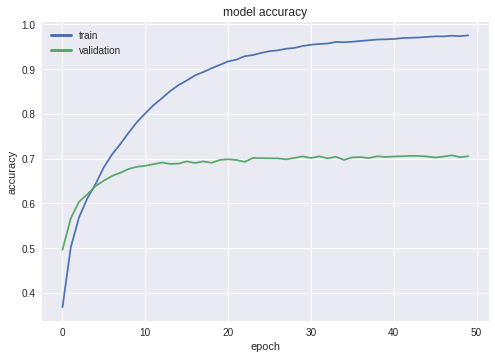

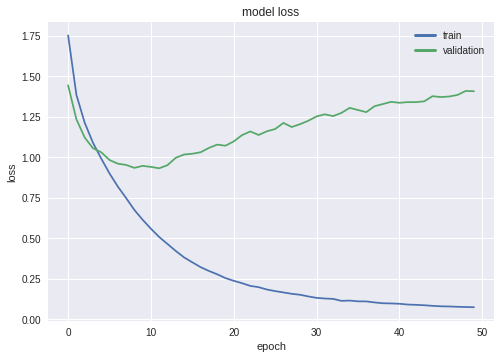

In [39]:
Show_Scores(model, DataGenerator, X_train, Y_train, X_test, Y_test)

In [40]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.999540  ;  loss = 0.005631


In [41]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Validation: accuracy1 = %f  ;  loss1 = %f" % (accuracy, loss))

Validation: accuracy1 = 0.705500  ;  loss1 = 1.407352


In [42]:
# Save the trained weights in to .h5 format
model.save_weights("HARDAYAL_BATCH_5_ASSIGNMENT4B_SGD.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
files.download("HARDAYAL_BATCH_5_ASSIGNMENT4B_SGD.h5")